#Step =1
import library

In [115]:
#Import the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder

# step 2 
**Load the data set**

In [116]:
#Load the dataset
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Data Preprocessing

In [117]:
#Check the shape of dataset
df.shape

(891, 15)

In [118]:
#Check the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [119]:
#Check the missing values
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [120]:
#Check the percentage of missing value
df.isnull().sum()/df.shape[0]*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [121]:
#Find the duplicate value
df.duplicated().sum()

107

In [122]:
#Check the garbage value
for i in df.select_dtypes(include="category"):
    print(df[i].value_counts())
    print("***"*10)

class
Third     491
First     216
Second    184
Name: count, dtype: int64
******************************
deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64
******************************


# Step =3
**Exploratory Data Analysis(EDA)**

In [123]:
#Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [124]:
#Describe the Numerical columns
df.describe(include='float')

,age,fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [125]:
#Describe the Object columns
df.describe(include='object')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


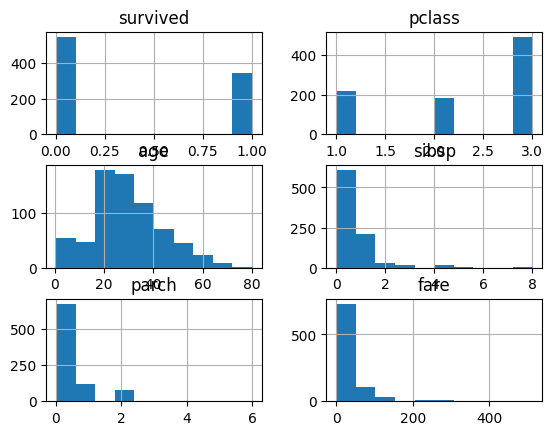

In [126]:

df.hist()
plt.show()

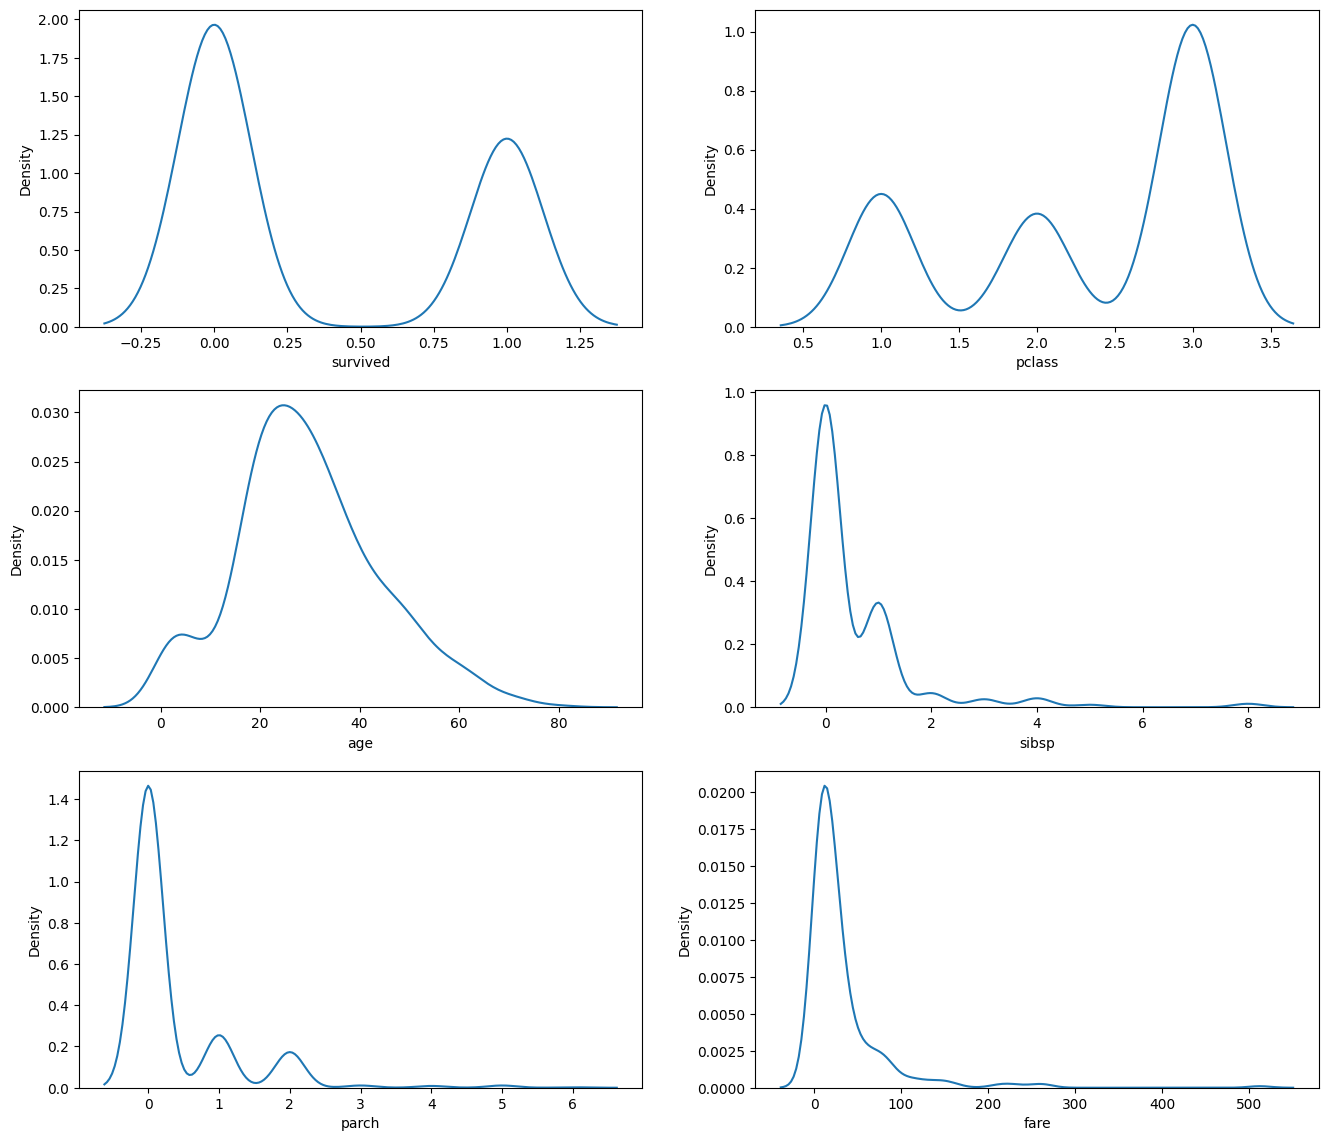

In [127]:
# check the Skewness

plt.figure(figsize=(16,14))
for i,j in enumerate(df.select_dtypes(include='number')):
    plt.subplot(3,2,i+1)
    sns.kdeplot(df[j])
plt.show()

In [128]:
#Check the number of columns
df.columns.value_counts().sum()

15

In [129]:
#Check the categorical column
df.select_dtypes(include='category').columns

Index(['class', 'deck'], dtype='object')

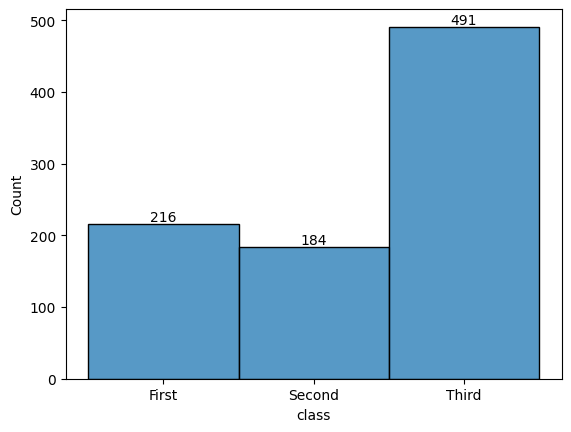

In [130]:
#Draw the histoplot to understand the distribution of category
ax=sns.histplot(data=df,x="class")
for Container in ax.containers:
    ax.bar_label(Container)
plt.show()

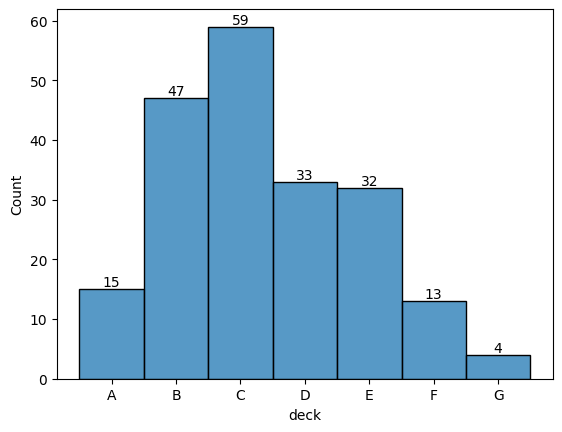

In [131]:
ax=sns.histplot(data=df,x="deck")
for Container in ax.containers:
    ax.bar_label(Container)
plt.show()

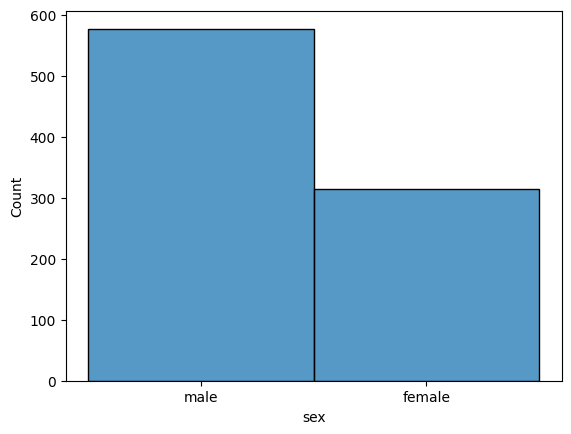

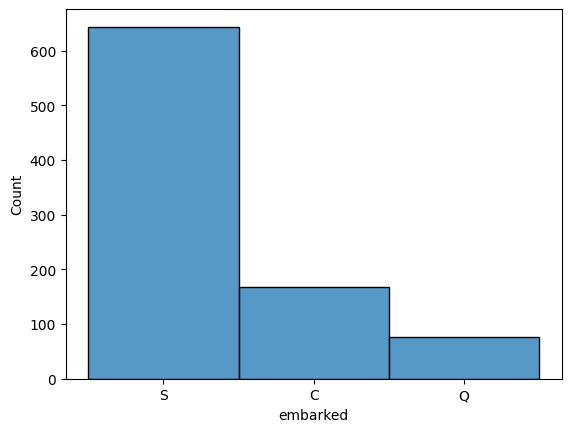

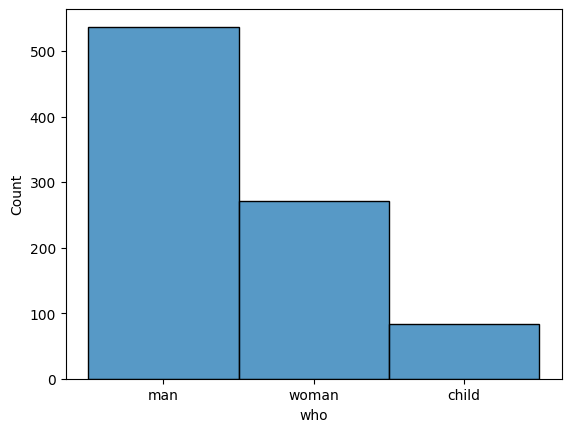

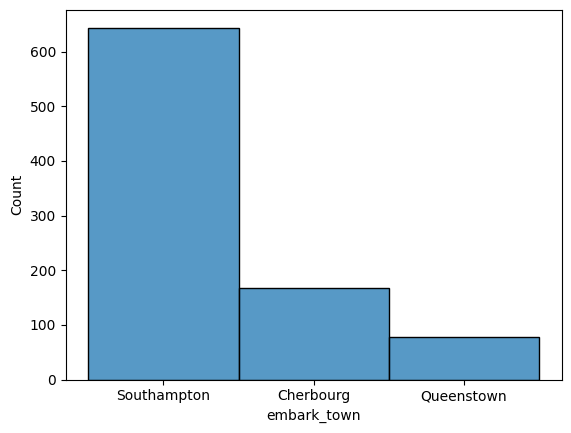

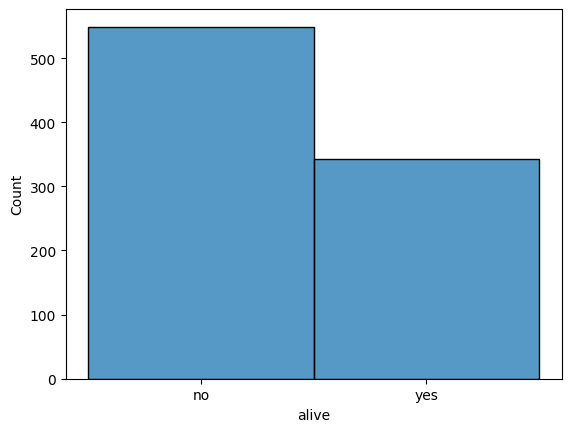

In [132]:
#Draw the histogram to understand the distribution of object
for i in df.select_dtypes(include='object').columns:
    sns.histplot(data=df,x=i,)
    plt.show()

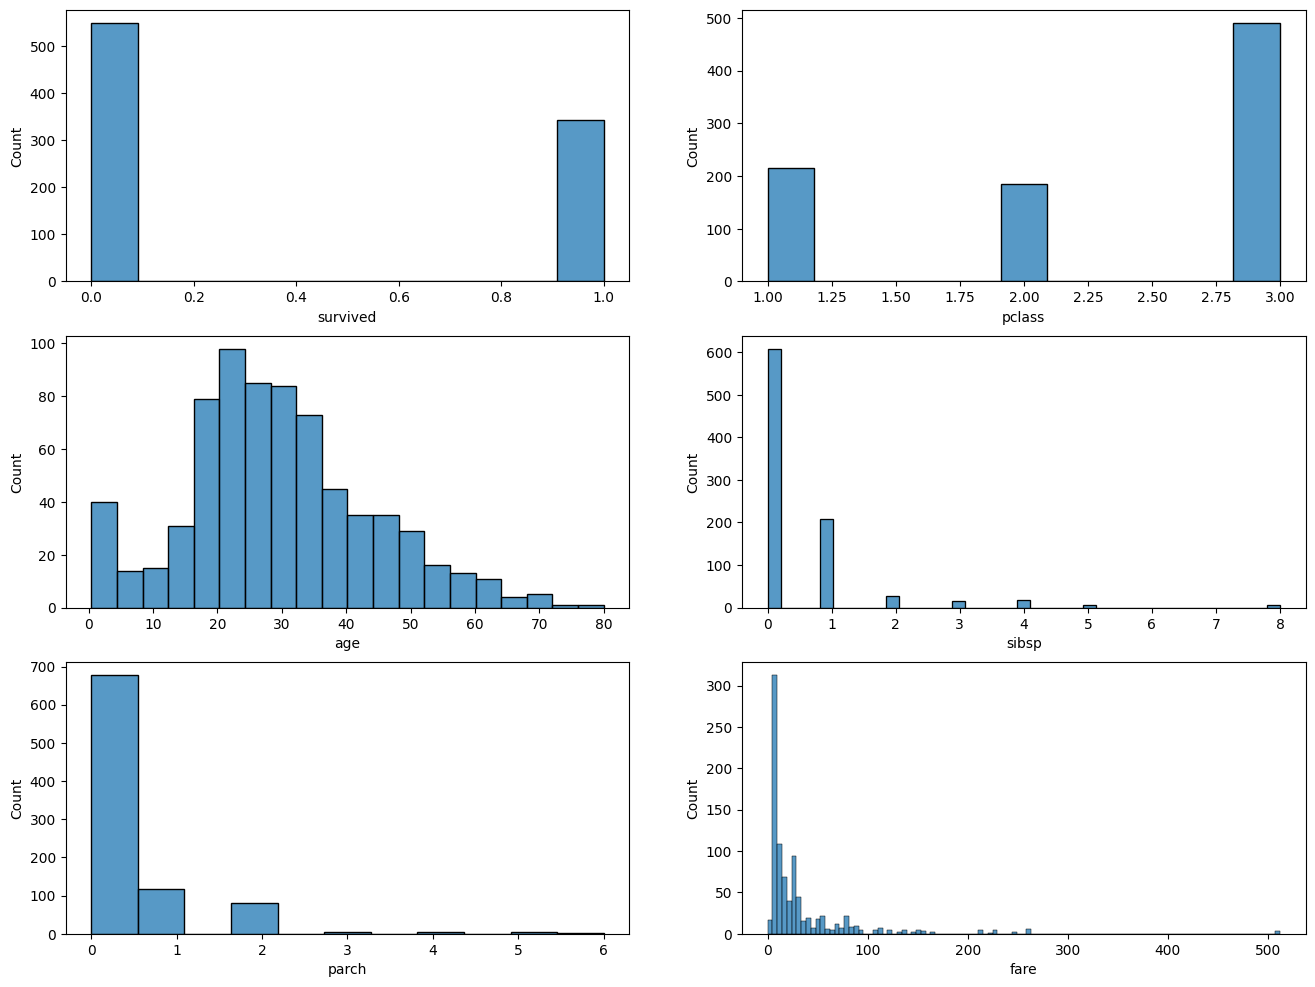

In [133]:
#Draw the histogram to understand the distribution of numerical
plt.figure(figsize=(16,12))
for i,j in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(3,2,i+1)
    sns.histplot(df[j])
plt.show()

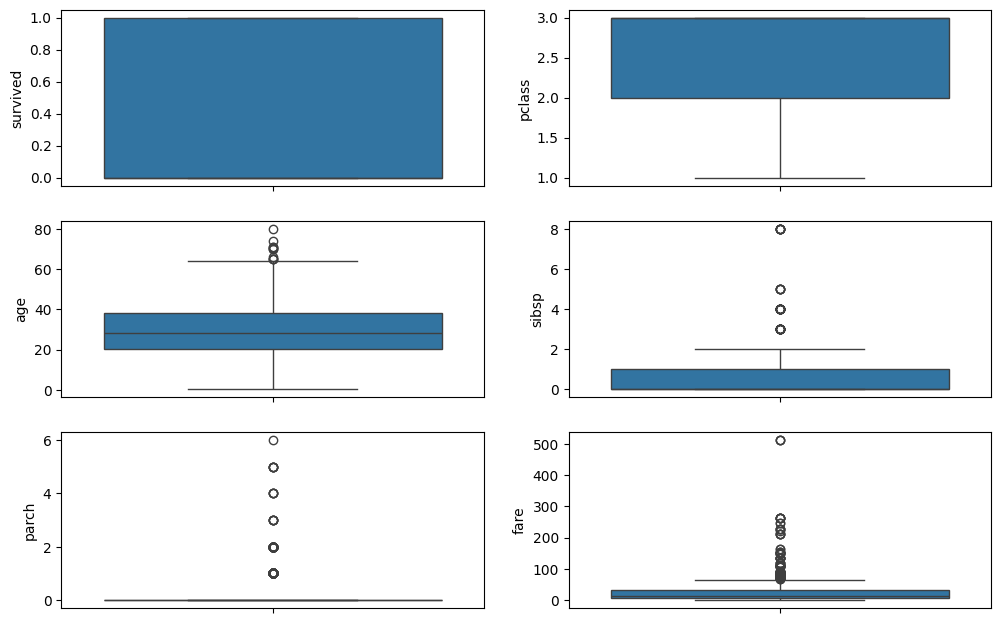

In [134]:
#use the boxplot for detect the outlier
#Draw the histogram to understand the distribution of category
plt.figure(figsize=(12,16))
for i,j in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(6,2,i+1)
    sns.boxplot(df[j])
plt.show()

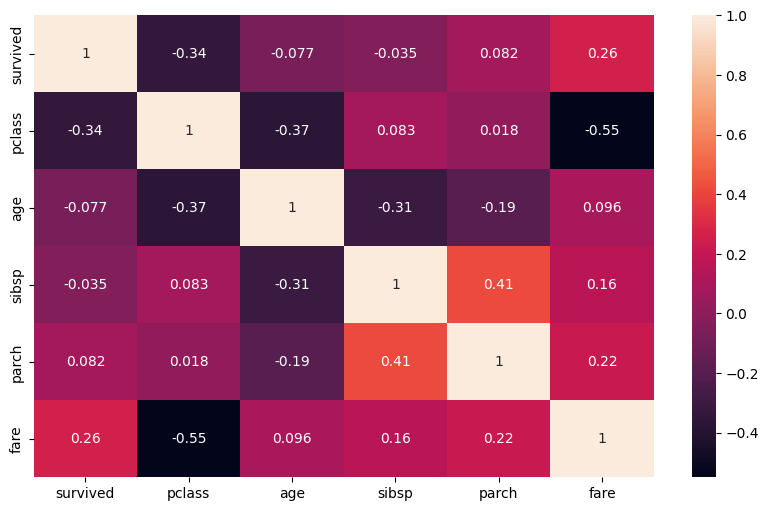

In [135]:
#Check the corellation with heatmap
heat=df.select_dtypes(include='number').corr()
plt.figure(figsize=(10,6))
sns.heatmap(heat,annot=True)#annot is used for value in heat map
plt.show()

# Step =4 
**Handling  missing values**

In [136]:
df.drop(columns=["who","deck","alone","embarked"],inplace=True)

In [137]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,embark_town,alive
0,0,3,male,22.0,1,0,7.2500,Third,True,Southampton,no
1,1,1,female,38.0,1,0,71.2833,First,False,Cherbourg,yes


In [138]:

from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)#It is only work on simply numerical data

for i in df.select_dtypes(include='number').columns:
    df[i]=imputer.fit_transform(df[[i]])
     

#You can drop the deck column because it has much empty column     
for i in df.columns:
    if df[i].dtype=="category" or df[i].dtype=='object':
        df[i]=df[i].fillna(df[i].mode()[0])
#Check the missing values
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
adult_male     0
embark_town    0
alive          0
dtype: int64

# Step = 5   
**Outlier treatment**   
**it only for continuous values**  

In [139]:
def outlier(col):
    q1,q3=np.percentile(col,[25,75])
    innerquartilerange=q3-q1
    loweroutlier=q1-1.5*innerquartilerange
    upperoutlier=q3+1.5*innerquartilerange
    return loweroutlier,upperoutlier
    

In [140]:

for i in [ 'pclass', 'age', 'sibsp', 'parch', 'fare']:
    loweroutlier,upperoutier=outlier(df[i])
    df[i]=np.where(df[i] < loweroutlier,loweroutlier,df[i]) #If less than lower outlier then fill it loweroutlier or as it
    df[i]=np.where(df[i] > upperoutier,upperoutier,df[i])

# step = 6 
duplicate and garbage value treatment 


In [141]:
df.drop_duplicates()

,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,embark_town,alive
0,0.0,3.0,male,22.000000,1.0,0.0,7.2500,Third,True,Southampton,no
1,1.0,1.0,female,38.000000,1.0,0.0,65.6344,First,False,Cherbourg,yes
2,1.0,3.0,female,26.000000,0.0,0.0,7.9250,Third,False,Southampton,yes
3,1.0,1.0,female,35.000000,1.0,0.0,53.1000,First,False,Southampton,yes
4,0.0,3.0,male,35.000000,0.0,0.0,8.0500,Third,True,Southampton,no
...,...,...,...,...,...,...,...,...,...,...,...
885,0.0,3.0,female,39.000000,0.0,0.0,29.1250,Third,False,Queenstown,no
887,1.0,1.0,female,19.000000,0.0,0.0,30.0000,First,False,Southampton,yes
888,0.0,3.0,female,29.699118,1.0,0.0,23.4500,Third,False,Southampton,no
889,1.0,1.0,male,26.000000,0.0,0.0,30.0000,First,True,Cherbourg,yes


# step = 7 
**Convert text into number**

In [146]:
# You can use other method
for i in df.columns:
    if df[i].dtype=="category" or df[i].dtype=='object':
        df[i]=LabelEncoder().fit_transform(df[i])
df["adult_male"]=LabelEncoder().fit_transform(df["adult_male"])
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,embark_town,alive
0,0.0,3.0,1,22.0,1.0,0.0,7.2500,2,1,2,0
1,1.0,1.0,0,38.0,1.0,0.0,65.6344,0,0,0,1


In [143]:
# Now this  is ready apply ML model but it not gave the good performance you can use other cleaning technique